In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report


In [15]:
data = pd.read_csv('IRIS_data_2.csv')
print(np.unique(data['Species']))
print(data)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa 

<AxesSubplot:>

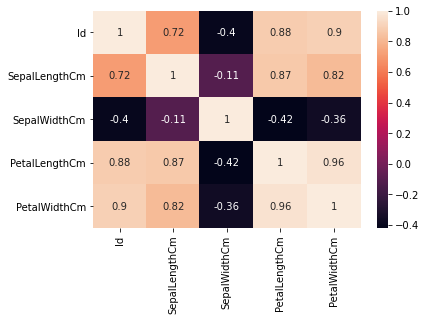

In [16]:
correl = data.corr()
sns.heatmap(correl,annot=True)

Text(0.5, 1.0, 'Scatter Plot')

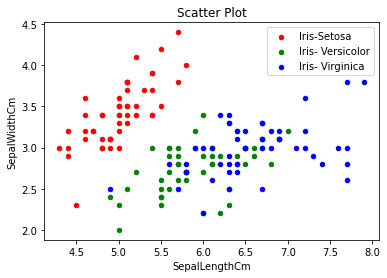

In [17]:
ax = data[data.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm',
                                                    y='SepalWidthCm',color='red',label='Iris-Setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm',
                                                   y='SepalWidthCm',color='green', label='Iris- Versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm',
                                                  y='SepalWidthCm', color='blue', label='Iris- Virginica', ax=ax)
ax.set_title("Scatter Plot")


In [18]:
encoder = LabelEncoder()
data['Species'] = encoder.fit_transform(data['Species'])
df_1= data.drop(['Id'], axis = 1)
print(np.unique(data['Species']))
print(df_1)

[0 1 2]
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]


In [19]:
data1 = df_1.values

X=data1 [:, 0:5]
Y= data1 [: , -1]

x_train = X[:112, ]
y_train = Y[:112, ]

x_test = X[112:150, ]
y_test = Y[112:150, ]

kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train, y_train)

y_pred = kmeans.predict(x_test)
print('Predicted:',y_pred)
print('Actual:',y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Predicted: [2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
Actual: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


In [20]:
print('Accuracy:',accuracy_score(y_pred, y_test))

Accuracy: 0.9473684210526315


In [21]:
print('Classification Report:')
summary = classification_report(y_test, y_pred)
print(summary)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         2.0       1.00      0.95      0.97        38

    accuracy                           0.95        38
   macro avg       0.50      0.47      0.49        38
weighted avg       1.00      0.95      0.97        38



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
